<a href="https://colab.research.google.com/github/jayaemekar/CSCI-611-AppiledMachineLearning/blob/main/JELab3test2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Name: Jayarani Emekar, CSCI-611 Date- 27 Feb 2021

 Sources/guidance/assistance received - Python tutorials scipy-lectures,Muller textbook

 Enviorment Developed and Tested: GOOGLE COLABORATORY (COLAB)



TASK 1 - IMPLEMENTATION

Imports used in KNN class

In [ ]:
# imports used as per specifications
import numpy as np
import math
from decimal import Decimal 
from scipy.stats import mode 

# imports used for loading and plotting the data as per specifications
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split

# imports to remove warnings
import warnings
warnings.filterwarnings('ignore')

Function to calculate euclidean distance

In [ ]:
# function to calculate euclidean distance
def euclidean(arr1, arr2):
    arr1 = np.array(arr1)
    arr2 = np.array(arr2)
    return np.sqrt(np.sum((arr1-arr2)**2))

function to calculate manhattan distance

In [ ]:
# function to calculate manhattan distance    
def manhattan( arr1, arr2):
    arr1 = np.array(arr1)
    arr2 = np.array(arr2)
    return np.sum(np.abs(arr1-arr2))

function to calculate minkowski distance

In [ ]:
# function to calculate minkowski distance    
def p_root(value, root):    
    root_value = 1 / float(root) 
    return round (Decimal(value) **
             Decimal(root_value), 3) 
  
def minkowski(arr1, arr2, p_value):   
    return (p_root(sum(pow(abs(a-b), p_value) 
            for a, b in zip(arr1, arr2)), p_value)) 

Function to calculate quicksort distance

In [ ]:
# function to calculate quicksort distance   
def quicksort(lst, index):
    if lst.ndim == 1 and index != -1:
      return quicksort_1d(lst)
    elif lst.ndim == 1 and index == -1:
      return quicksort_indices(lst)
    else:
        return quicksort_2d(lst,index)

def quicksort_1d(lst):

    less = []
    equal = []
    greater = []

    if len(lst) > 1:
        pivot = lst[0]
        for x in lst:
            if x < pivot:
                less.append(x)
            elif x == pivot:
                equal.append(x)
            elif x > pivot:
                greater.append(x)
        return quicksort_1d(less)+equal+quicksort_1d(greater) 
    else:  
        return lst

def quicksort_indices(lst):
    return [i for (v, i) in sorted((v, i) for (i, v) in enumerate(lst))]

def quicksort_2d(lst, index):
    if len(lst) == 0:
        return []
    else:
        pivot = lst[0]
        lesser = quicksort_2d([x for x in lst[1:] if x[index] < pivot[index]], index)
        greater = quicksort_2d([x for x in lst[1:] if x[index] >= pivot[index]], index)
        return lesser + [pivot] + greater

knn class and knnBuild should create an object, with which to invoke the knnFit and knnPredict as methods

In [ ]:
class KNN():

# initialize the KNN object
    def __init__(self, model, k, algorithm='euclidean',p=2,weights ='uniform'):
        self.model = model
        self.k = k
        self.algorithm = algorithm
        self.p = p
        self.weights = weights

# knnFit function
    def knnFit(self, X, y):
        self.X = X 
        self.y = y 
        # no_of_training_examples, no_of_features 
        self.m, self.n = X.shape
        return self

# This is the function to calculate the distance
    def _distance(self, data1, data2):
        """1: Manhattan, 2: Euclidean, 3: Minkowski"""
        if self.algorithm == 'euclidean':
            return euclidean(data1 , data2)          
        elif self.algorithm == 'manhattan':
            return manhattan(data1, data2)
        elif self.algorithm == 'minkowski':
            return minkowski(data1, data2 ,self.p)
        raise ValueError("algorithm not recognized")

# This is the function to compute the weights, distance/uniform (Bonus feature)
    def _compute_weights(self, distances):
        if self.weights == 'uniform':
            return [(1, y) for d, y in distances]
        elif self.weights == 'distance':
            matches = [(1, y) for d, y in distances if d == 0]
            return matches if matches else [(1/d, y) for d, y in distances]
        raise ValueError("weights not recognized: should be 'uniform' or 'distance'")

# This is knn predict function
    def knnPredict(self, X, y):
        if self.model == 'classifier':
            return self.predict_classifier(X)
        elif self.model == 'regressor':
            return self.predict_regressor(X)
        else:
            raise ValueError("Model not recognized: should be 'classifier' or 'regressor'")

# This is the function to calculate the knnScore (Bonus feature)
    def knnScore(self, X, y):
        if self.model == 'classifier':
            return sum(1 for p, t in zip(self.predict_classifier(X), y) if p == t) / len(y)
        elif self.model == 'regressor':
            return np.corrcoef(y, self.predict_regressor(X))[0,1]**2
        else:
            raise ValueError("Model not recognized: should be 'classifier' or 'regressor'")
    
# Function for regressor prediction 
    def predict_regressor( self, X_test ) : 
        self.X = X_test 
        # no_of_test_examples, no_of_features 
        self.m_test, self.n = X_test.shape 
        # initialize Y_predict 
        Y_predict = np.zeros( self.m_test ) 
        for i in range( self.m_test ) : 
            x = self.X[i] 
            # find the K nearest neighbors from current test example 
            neighbors = np.zeros( self.k ) 
            neighbors = self.find_neighbors_regressor( x ) 
            # calculate the mean of K nearest neighbors 
            Y_predict[i] = np.mean( neighbors ) 
        return Y_predict 

# Function for classifier prediction 
    def predict_classifier( self, X_test ) : 
        self.X_test = X_test 
        # no_of_test_examples, no_of_features 
        self.m_test, self.n = X_test.shape 
        # initialize Y_predict 
        Y_predict = np.zeros( self.m_test ) 
        for i in range( self.m_test ) : 
            x = self.X_test[i] 
            # find the K nearest neighbors from current test example 
            neighbors = np.zeros( self.k ) 
            neighbors = self.find_neighbors_classifier( x ) 
            # most frequent class in K neighbors 
            Y_predict[i] = mode( neighbors )[0][0]
        return Y_predict 

# Function to find the K nearest neighbors to current test example 
    def find_neighbors_regressor( self, x ) : 
        # calculate all the euclidean distances between current test example x and training set X_train 
        distances = np.zeros( self.m ) 
        for i in range( self.m ) : 
            d = self._distance(x, self.X[i])
            distances[i] = d 
        # sort Y_train according to distance_array and 
        inds = quicksort(distances, -1)
        # store into Y_train_sorted 
        Y_train_sorted = self.y[inds] 
        return Y_train_sorted[:self.k] 

# Function to find the K nearest neighbors to current test example 
    def find_neighbors_classifier( self, x ) : 
        # calculate all the euclidean distances between current test example x and training set X_train 
        distances = np.zeros( self.m ) 
        for i in range( self.m ) : 
            d = self._distance(x, self.X[i])
            distances[i] = d 
        # sort Y_train according to distance_array and  
        inds = quicksort(distances, -1)
        # store into Y_train_sorted
        Y_train_sorted = self.y[inds] 
        return Y_train_sorted[:self.k] 

class knnBuild(KNN):
    def __init__(self, model, k, algorithm='euclidean',p=2,weights ='uniform'):
	      KNN.__init__(self,model, k, algorithm='euclidean',p=2,weights ='uniform')

TEST 2 – kNN REGRESSOR

a. Load sample regression data


In [ ]:
#TEST 2: Load Sample regression data
diabetes_data = datasets.load_diabetes()
train_data = np.array(diabetes_data.data)
train_labels = np.array(diabetes_data.target)
print('Shape of diabetes dataset :' ,diabetes_data.data.shape)
print('Features of diabetes dataset :' ,diabetes_data.feature_names)
# Put everything into a Pandas DataFrame
data = pd.DataFrame(data=np.c_[train_data, train_labels], columns=diabetes_data.feature_names + ['category'])
print('load diabetes_data :' )
print(data)
print ('Data loaded successfully. ')

Shape of diabetes dataset : (442, 10)
Features of diabetes dataset : ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
load diabetes_data :
          age       sex       bmi  ...        s5        s6  category
0    0.038076  0.050680  0.061696  ...  0.019908 -0.017646     151.0
1   -0.001882 -0.044642 -0.051474  ... -0.068330 -0.092204      75.0
2    0.085299  0.050680  0.044451  ...  0.002864 -0.025930     141.0
3   -0.089063 -0.044642 -0.011595  ...  0.022692 -0.009362     206.0
4    0.005383 -0.044642 -0.036385  ... -0.031991 -0.046641     135.0
..        ...       ...       ...  ...       ...       ...       ...
437  0.041708  0.050680  0.019662  ...  0.031193  0.007207     178.0
438 -0.005515  0.050680 -0.015906  ... -0.018118  0.044485     104.0
439  0.041708  0.050680 -0.015906  ... -0.046879  0.015491     132.0
440 -0.045472 -0.044642  0.039062  ...  0.044528 -0.025930     220.0
441 -0.045472 -0.044642 -0.073030  ... -0.004220  0.003064      57.0

[442 rows x 11 co

b. Visualize the data

visulaizing the dataset using scatterplot

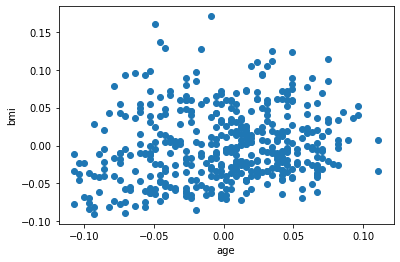

In [ ]:
# visuallize the data using scatterplot: Create scatterplot
scatter_feature_name_1='age'
scatter_feature_name_2='bmi'
fig = plt.scatter(data[scatter_feature_name_1], data[scatter_feature_name_2])
plt.xlabel(scatter_feature_name_1)
plt.ylabel(scatter_feature_name_2)
plt.show()

Diabetes data visulation using Scatterplot for regression 

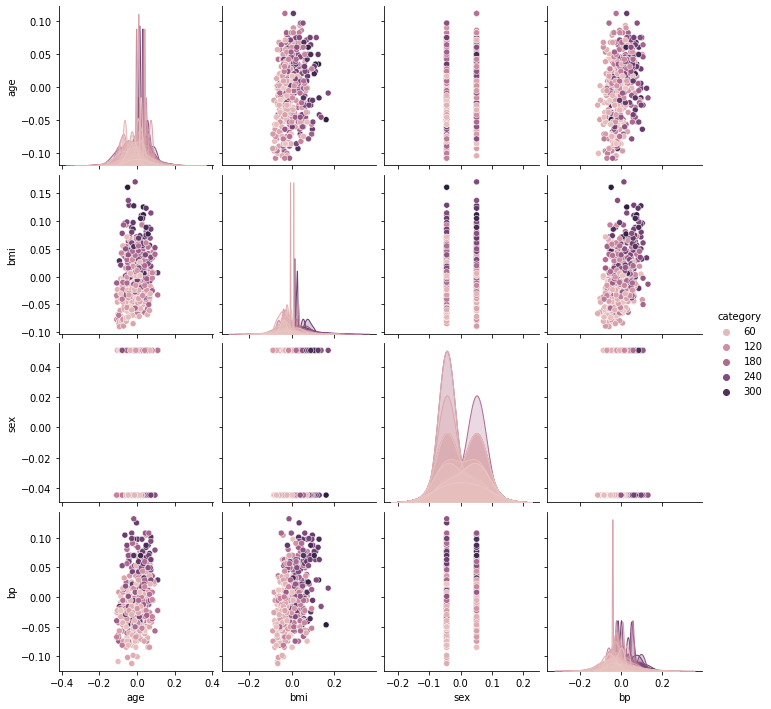

In [ ]:
# scatterplot matrix of regression data
fig = sns.pairplot(data=data[['age', 'bmi', 'sex', 'bp', 'category']], hue='category')
plt.show()

c. Test your custom kNN regressor on the data

Regression example: Testing custom kNN regressor on the data

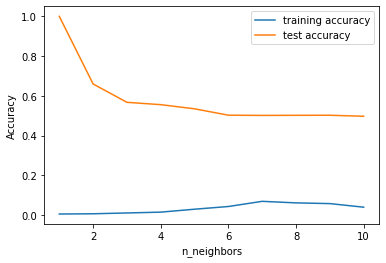

In [ ]:
# Regression example :Test your custom kNN regressor on the data
X_train, X_test, y_train, y_test = train_test_split(
    diabetes_data.data, diabetes_data.target)

training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # build the model
    clf = knnBuild('regressor',n_neighbors)
    clf.knnFit(X_test, y_test)
    clf.knnPredict(X_test,y_test)
    # record training set accuracy
    training_accuracy.append(clf.knnScore(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.knnScore(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

Testing Custom KNN Build class against actual class for regression data for k=3

In [ ]:
# Custom KNN class Testing Custom KNN Build class against actual class
clf = knnBuild('regressor',3)
clf.knnFit(X_test, y_test)
clf.knnPredict(X_test,y_test)
print ('Custom KNN Classifier test Score : ',clf.knnScore(X_test,y_test))
clf.knnFit(X_train, y_train)
clf.knnPredict(X_train, y_train)
print ('Custom KNN Classifier train Score : ',clf.knnScore(X_train, y_train))

# Actual KNN class
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(3)
knn.fit(X_test, y_test)
knn.predict(X_test)
print ('Actual KNN Classifier test Score : ',knn.score(X_test,y_test))
knn.fit(X_train, y_train)
knn.predict(X_train)
print('Actual Knn Classifier train score : ',knn.score(X_train, y_train))

Custom KNN Classifier test Score :  0.5672634793364286
Custom KNN Classifier train Score :  0.6768329499508997
Actual KNN Classifier test Score :  0.556767336064572
Actual Knn Classifier train score :  0.6724085225502414
